**Piecewise Constant Scheduling**

Piecewise constant scheduling is a method used in optimization, particularly in training neural networks, where the learning rate is kept constant over specific intervals of time and then changed at predefined points.

Mathematical Formulation

Given intervals

[
𝑡
0
,
𝑡
1
)
,
[
𝑡
1
,
𝑡
2
)
,
…
,
[
𝑡
𝑘
−
1
,
𝑡
𝑘
)
[t
0
​
 ,t
1
​
 ),[t
1
​
 ,t
2
​
 ),…,[t
k−1
​
 ,t
k
​
 ) with learning rates
𝜂
𝑖
η
i
​
  for
𝑡
𝑖
−
1
≤
𝑡
<
𝑡
𝑖
t
i−1
​
 ≤t<t
i
​
 , the learning rate
𝜂
𝑡
η
t
​
  can be expressed as:

  η
t
​
 =η
i
​
 fort
i−1
​
 ≤t<t
i
​

Update Rule

The gradient descent update rule becomes:

θ
t+1
​
 =θ
t
​
 −η
i
​
 ∇
θ
​
 L(θ
t
​
 )fort
i−1
​
 ≤t<t
i
​


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the model architecture
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

    for layer in range(100):
        model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

    # Add the output layer with 10 neurons and softmax activation
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    return model

In [3]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split the data into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize the pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Define the optimizer with legacy SGD and learning rate decay
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

# Compute the mean and standard deviation of the training set for normalization
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

# Normalize the datasets using the computed mean and std deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [5]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

# Add the output layer with 10 neurons and softmax activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Define the optimizer with legacy SGD and learning rate decay


In [9]:
# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [10]:
# Function to build and train the model
def build_and_train_model(optimizer):
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, epochs=10,
                        validation_data=(X_valid_scaled, y_valid))
    return history

# Train the model with power scheduling
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 39s 18ms/step - loss: 1.9246 - accuracy: 0.1953 - val_loss: 1.5117 - val_accuracy: 0.3544
Epoch 2/10
1719/1719 [==============================] - 30s 17ms/step - loss: 1.5487 - accuracy: 0.3239 - val_loss: 1.2883 - val_accuracy: 0.4496
Epoch 3/10
1719/1719 [==============================] - 32s 19ms/step - loss: 1.4271 - accuracy: 0.3858 - val_loss: 1.5362 - val_accuracy: 0.3548
Epoch 4/10
1719/1719 [==============================] - 32s 19ms/step - loss: 2.1251 - accuracy: 0.1665 - val_loss: 1.4967 - val_accuracy: 0.3206
Epoch 5/10
1719/1719 [==============================] - 31s 18ms/step - loss: 1.8891 - accuracy: 0.2327 - val_loss: 1.7214 - val_accuracy: 0.2192
Epoch 6/10
1719/1719 [==============================] - 31s 18ms/step - loss: 1.4675 - accuracy: 0.3660 - val_loss: 1.2642 - val_accuracy: 0.4532
Epoch 7/10
1719/1719 [==============================] - 31s 18ms/step - loss: 1.2970 - accuracy: 0.4533 - val_loss: 1.2742 -

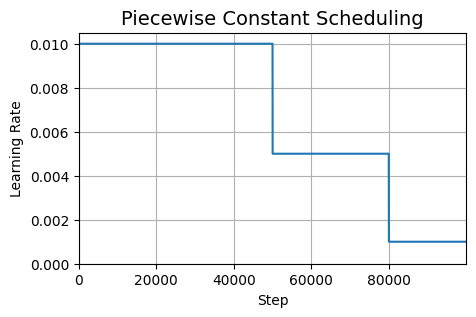

In [12]:
# Define boundaries and values for piecewise constant scheduling
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

# Create an array representing the steps
steps = np.arange(100_000)

# Initialize the learning rates array with the first value
lrs = np.full(len(steps), values[0])

# Update the learning rates based on the boundaries
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

# Plot the learning rates over the steps
plt.figure(figsize=(5, 3))
plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [13]:
# Define a function to create a piecewise constant schedule
def piecewise_constant(boundaries, values):
    # Convert boundaries to a numpy array, prepending 0 to the boundaries
    boundaries = np.array([0] + boundaries)
    # Convert values to a numpy array
    values = np.array(values)

    # Define the piecewise constant function
    def piecewise_constant_fn(epoch):
        # Return the appropriate value based on the current epoch
        return values[(boundaries > epoch).argmax() - 1]

    return piecewise_constant_fn

# Create a piecewise constant function with specified boundaries and values
piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [16]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [17]:
n_epochs = 20

# Create a learning rate scheduler callback using the piecewise constant function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
model = build_model()

# Initialize the optimizer with an initial learning rate (lr0)
lr0 = 0.01
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 [==============================] - 104s 34ms/step - loss: 33.4269 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.0994 - lr: 0.0100
Epoch 2/20
1719/1719 [==============================] - 56s 33ms/step - loss: 2.3038 - accuracy: 0.1011 - val_loss: 2.3044 - val_accuracy: 0.0980 - lr: 0.0100
Epoch 3/20
1719/1719 [==============================] - 55s 32ms/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1016 - lr: 0.0100
Epoch 4/20
1719/1719 [==============================] - 56s 32ms/step - loss: 2.3039 - accuracy: 0.1005 - val_loss: 2.3036 - val_accuracy: 0.1030 - lr: 0.0100
Epoch 5/20
1719/1719 [==============================] - 58s 34ms/step - loss: 2.3039 - accuracy: 0.0991 - val_loss: 2.3043 - val_accuracy: 0.1054 - lr: 0.0100
Epoch 6/20
1719/1719 [==============================] - 54s 31ms/step - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.1016 - lr: 0.0050
Epoch 7/20
1719/1719 [======================

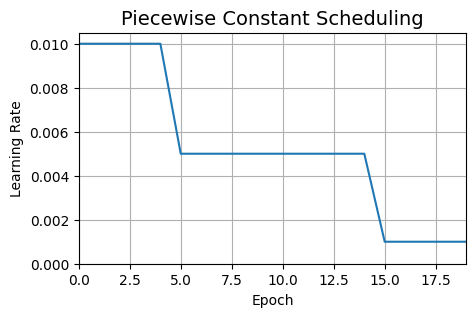

In [19]:
# Plot the learning rate schedule
steps = np.arange(n_epochs)
lrs = np.array([piecewise_constant_fn(step) for step in steps])

plt.figure(figsize=(5, 3))
plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()